In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [3]:
data=pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep="\t")

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**we have missing values in the Income table and as this is a clustring not a predicting problem , we can't really guess what the income is , so we will drop the missing values**

In [6]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


**Now regarding the Dt_customer , we don't know what date should we use in order to extract number of days for each customer 
so i will just use the most recent record in our data**

In [9]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


In [8]:
max_date = data['Dt_Customer'].max()
data['_num_days'] = (max_date - data['Dt_Customer']).dt.days

**Based on the recent dates , I'm going to assume that we live in 2015 .. 
also we notice a lot of values in the categorical features 
here comes the feature engineering part**

In [9]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2015-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [13]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,_num_days,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,512.006318,46.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,232.469034,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,340.000000,38.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,513.000000,45.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,686.000000,56.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1063.000000,122.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

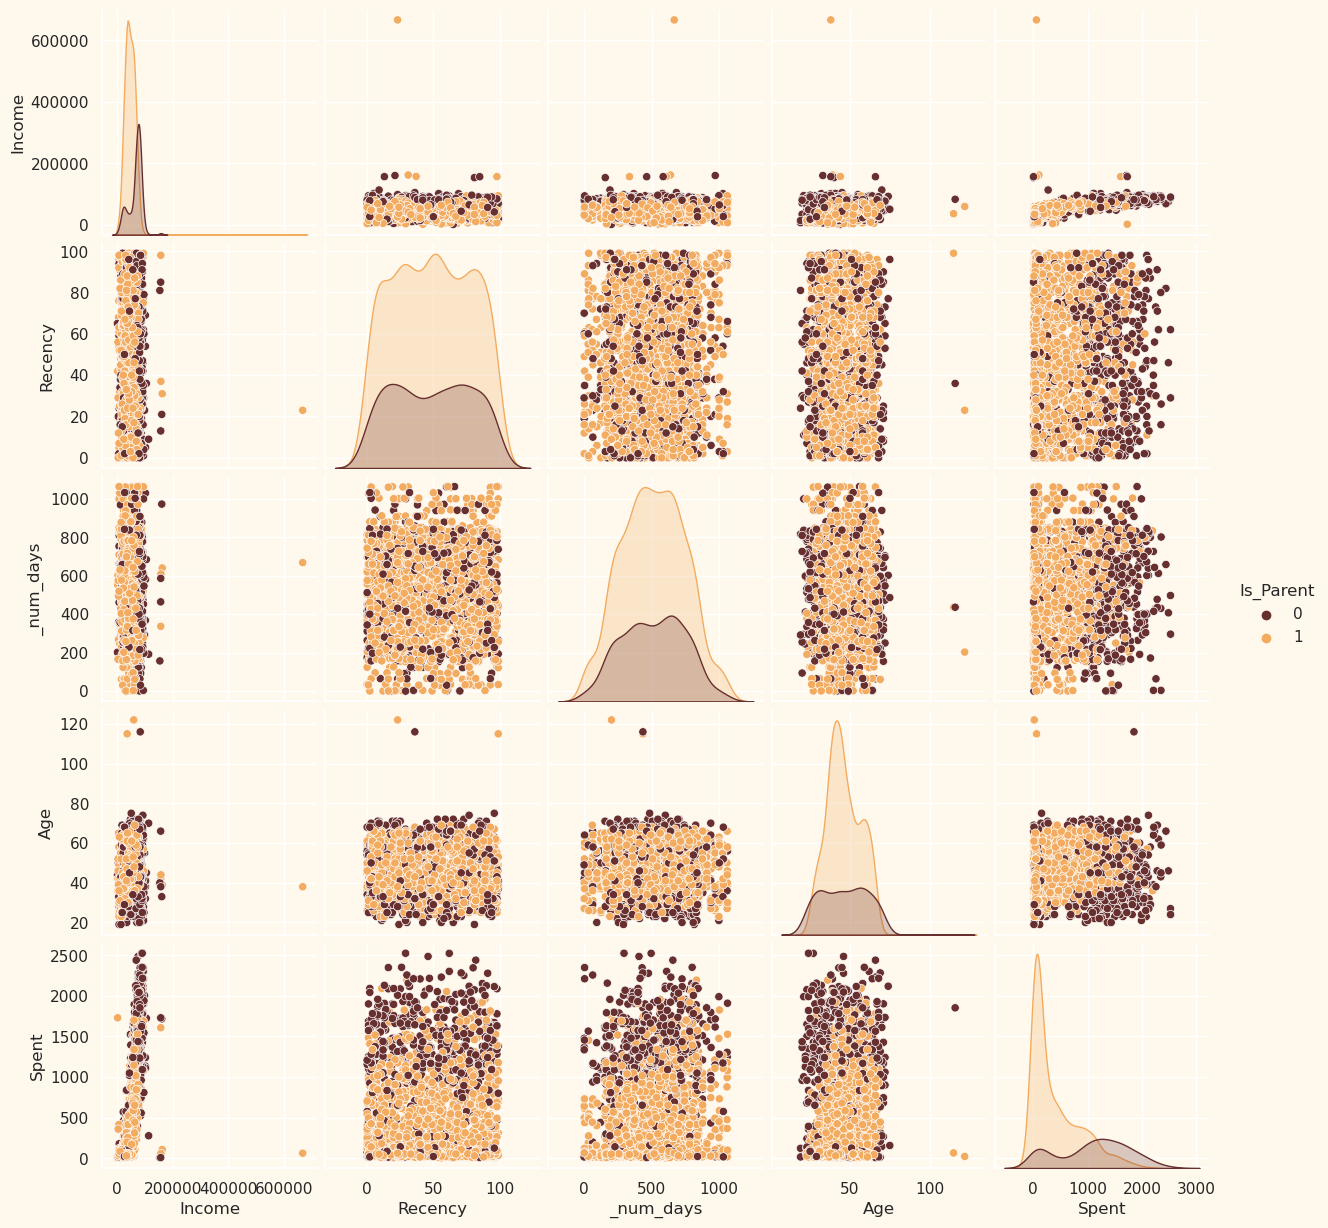

In [8]:
from matplotlib import colors
from matplotlib.colors import ListedColormap
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "_num_days", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

**conclusion : We have a lot of work to do with outliers**

In [10]:
q1_income = np.percentile(data['Income'], 25)
q3_income = np.percentile(data['Income'], 75)

q1_age = np.percentile(data['Age'], 25)
q3_age = np.percentile(data['Age'], 75)

iqr_income = q3_income - q1_income
iqr_age = q3_age - q1_age

threshold = 1.5

outliers_income = data[(data['Income'] < q1_income - threshold * iqr_income) | (data['Income'] > q3_income + threshold * iqr_income)]
outliers_age = data[(data['Age'] < q1_age - threshold * iqr_age) | (data['Age'] > q3_age + threshold * iqr_age)]

print("Outliers in 'Income':")
print(outliers_income)

print("\nOutliers in 'Age':")
print(outliers_age)


Outliers in 'Income':
         Education     Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
164   Postgraduate 157243.000        0         1       98     20       2   
617   Postgraduate 162397.000        1         1       31     85       1   
655       Graduate 153924.000        0         0       81      1       1   
687   Postgraduate 160803.000        0         0       21     55      16   
1300  Postgraduate 157733.000        1         0       37     39       1   
1653      Graduate 157146.000        0         0       13      1       0   
2132  Postgraduate 156924.000        0         0       85      2       1   
2233      Graduate 666666.000        1         0       23      9      14   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
164   1582     1       2     1                 15                0   
617     16     2       1     2                  0                0   
655      1     1       1     1                  0                0   
687   1622   

In [11]:
# Drop the maximum value in 'Income'
max_income = data['Income'].max()
data = data[data['Income'] != max_income]

# Remove outliers in 'Age'
q1_age = np.percentile(data['Age'], 25)
q3_age = np.percentile(data['Age'], 75)
iqr_age = q3_age - q1_age
threshold = 1.5

lower_bound = q1_age - threshold * iqr_age
upper_bound = q3_age + threshold * iqr_age

data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]


In [25]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', '_num_days',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [12]:
df_segmentation=data.copy()

In [13]:
data1 = pd.get_dummies(data1)
data1.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,_num_days,Age,Spent,Children,Family_Size,Is_Parent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.000,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,58,1617,0,1,0,1,0,0,1,0
1,46344.000,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,61,27,2,3,1,1,0,0,1,0
2,71613.000,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,50,776,0,2,0,1,0,0,0,1
3,26646.000,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,31,53,1,3,1,1,0,0,0,1
4,58293.000,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,34,422,1,3,1,0,1,0,0,1


In [13]:
df_segmentation.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', '_num_days',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [30]:
df_segmentation.head()

,Education,Income,Recency,_num_days,Age,Spent,Family_Size,Is_Parent,Living_With
0,Graduate,58138.000,58,971,58,1617,1,0,Alone
1,Graduate,46344.000,38,125,61,27,3,1,Alone
2,Graduate,71613.000,26,472,50,776,2,0,Partner
3,Graduate,26646.000,26,65,31,53,3,1,Partner
4,Postgraduate,58293.000,94,321,34,422,3,1,Partner


In [14]:
# Define the mapping dictionary
education_mapping = {
    "Undergraduate": 0,
    "Graduate": 1,
    "Postgraduate": 2
}

# Apply the mapping to the "education" column
df_segmentation["Education"] = df_segmentation["Education"].map(education_mapping)


In [15]:
df_segmentation["Living_With"].value_counts()

Partner    1428
Alone       784
Name: Living_With, dtype: int64

In [16]:
Living_with_mapping={
    "Alone" : 0 ,
    "Partner": 1
}

df_segmentation["Living_With"] = df_segmentation["Living_With"].map(Living_with_mapping)

In [17]:
df_segmentation=df_segmentation[['Education','Income','Recency','_num_days','Age','Spent','Family_Size','Is_Parent','Living_With']]

In [18]:
df_segmentation.corr()

,Education,Income,Recency,_num_days,Age,Spent,Family_Size,Is_Parent,Living_With
Education,1.000,0.158,-0.016,-0.073,0.193,0.095,0.045,0.027,-0.011
Income,0.158,1.000,0.008,-0.028,0.200,0.793,-0.287,-0.403,-0.005
Recency,-0.016,0.008,1.000,0.031,0.016,0.020,0.015,0.002,-0.000
_num_days,-0.073,-0.028,0.031,1.000,-0.021,0.139,-0.028,-0.005,0.002
Age,0.193,0.200,0.016,-0.021,1.000,0.116,0.079,-0.012,0.004
Spent,0.095,0.793,0.020,0.139,0.116,1.000,-0.424,-0.522,-0.021
Family_Size,0.045,-0.287,0.015,-0.028,0.079,-0.424,1.000,0.692,0.563
Is_Parent,0.027,-0.403,0.002,-0.005,-0.012,-0.522,0.692,1.000,0.059
Living_With,-0.011,-0.005,-0.000,0.002,0.004,-0.021,0.563,0.059,1.000


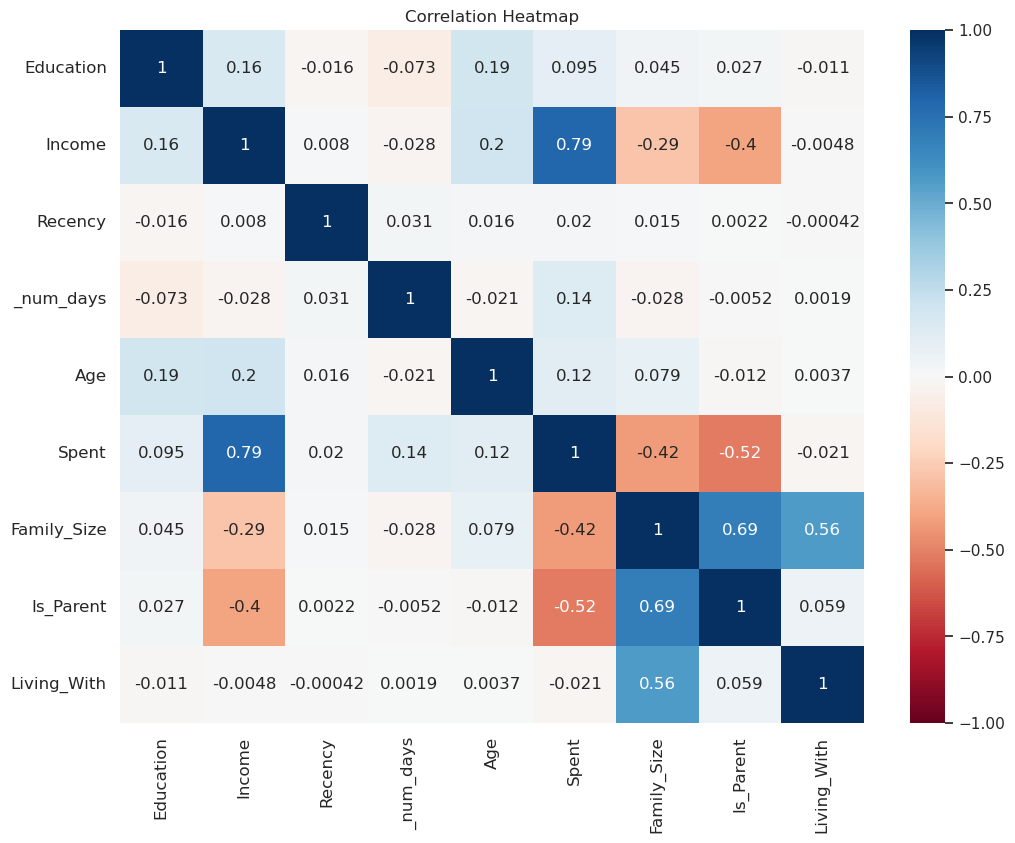

In [19]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

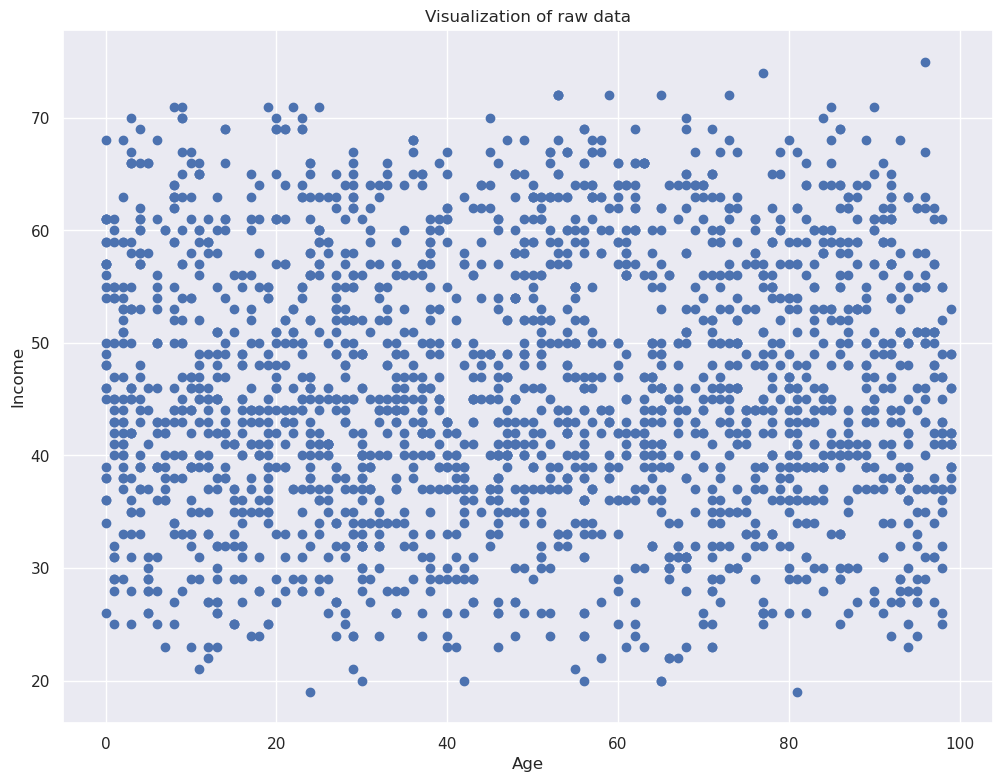

In [20]:
plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

In [21]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [22]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

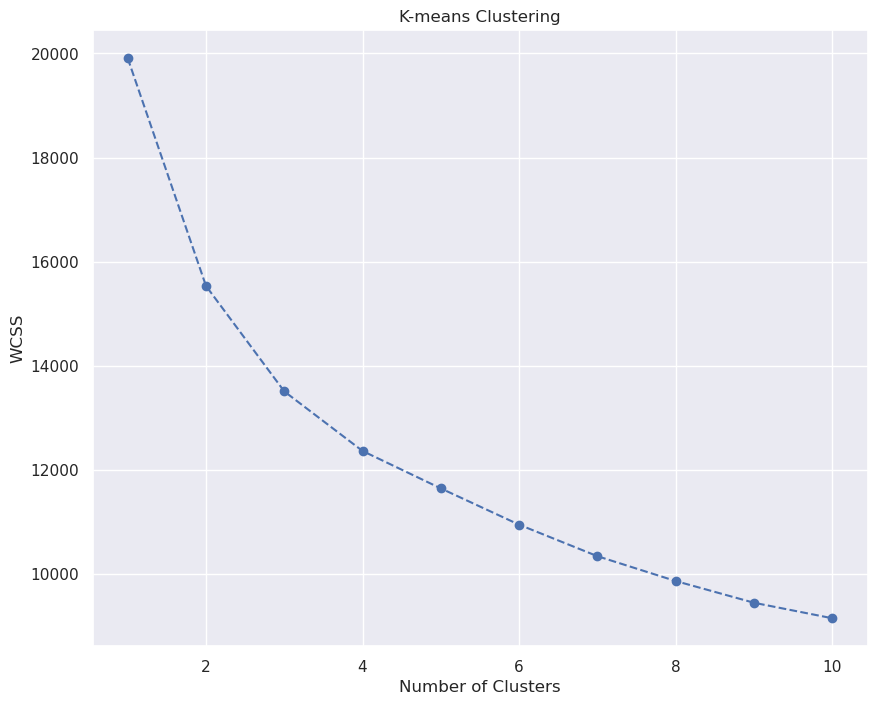

In [23]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [24]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [25]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [26]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [27]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Education,Income,Recency,_num_days,Age,Spent,Family_Size,Is_Parent,Living_With
Segment K-means,,,,,,,,,
0,1.570,55292.583,50.245,503.963,51.249,579.100,3.357,0.994,0.984
1,1.311,75852.000,49.464,507.360,47.196,1353.108,1.620,0.016,0.603
2,1.264,43504.757,47.232,512.044,45.750,358.942,2.176,0.903,0.000
3,0.833,32513.191,49.022,527.937,38.570,155.149,3.090,0.857,0.994


In [28]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Age']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [29]:
df_segm_analysis

,Education,Income,Recency,_num_days,Age,Spent,Family_Size,Is_Parent,Living_With,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,
0,1.570,55292.583,50.245,503.963,51.249,579.100,3.357,0.994,0.984,642,0.290
1,1.311,75852.000,49.464,507.360,47.196,1353.108,1.620,0.016,0.603,511,0.231
2,1.264,43504.757,47.232,512.044,45.750,358.942,2.176,0.903,0.000,568,0.257
3,0.833,32513.191,49.022,527.937,38.570,155.149,3.090,0.857,0.994,491,0.222


In [30]:
df_segm_analysis.rename({0:'upper class',
                         1:'high class',
                         2:'average class',
                         3:'below average class'})

,Education,Income,Recency,_num_days,Age,Spent,Family_Size,Is_Parent,Living_With,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,
upper class,1.570,55292.583,50.245,503.963,51.249,579.100,3.357,0.994,0.984,642,0.290
high class,1.311,75852.000,49.464,507.360,47.196,1353.108,1.620,0.016,0.603,511,0.231
average class,1.264,43504.757,47.232,512.044,45.750,358.942,2.176,0.903,0.000,568,0.257
below average class,0.833,32513.191,49.022,527.937,38.570,155.149,3.090,0.857,0.994,491,0.222


We notice  
1. High Class : Very High Income , well educated , seniors , Spend a lot , Non Parents 
2. upeer class : High income ,well educated , Good spend , parents and big family size 
3. average class : average income , avergae education , average spend , parents and singles 
4. below average class : weak income , wek education , young , spend less , parents and big family size

In [31]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'upper class',
                         1:'high class',
                         2:'average class',
                         3:'below average class'})

In [32]:
df_segm_kmeans.head()

,Education,Income,Recency,_num_days,Age,Spent,Family_Size,Is_Parent,Living_With,Segment K-means,Labels
0,1,58138.000,58,971,58,1617,1,0,0,1,high class
1,1,46344.000,38,125,61,27,3,1,0,2,average class
2,1,71613.000,26,472,50,776,2,0,1,1,high class
3,1,26646.000,26,65,31,53,3,1,1,3,below average class
4,2,58293.000,94,321,34,422,3,1,1,0,upper class


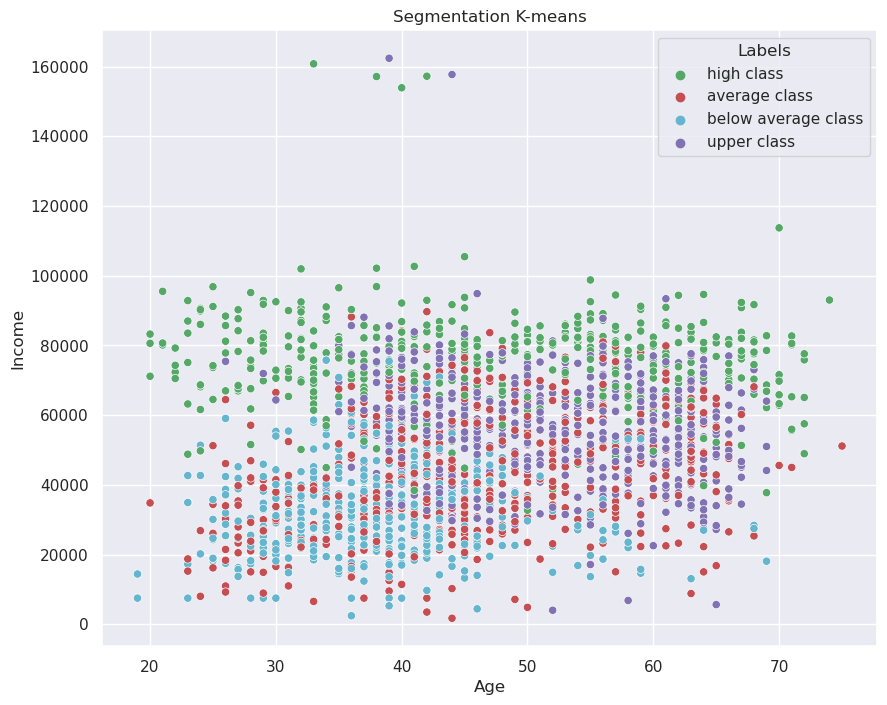

In [33]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_kmeans['Labels'], palette=['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [34]:
pca = PCA()
pca.fit(segmentation_std)
pca.explained_variance_ratio_

array([0.29408402, 0.1643902 , 0.12792046, 0.11318508, 0.10674115,
       0.08886219, 0.07117397, 0.01957965, 0.01406327])

Text(0, 0.5, 'Cumulative Explained Variance')

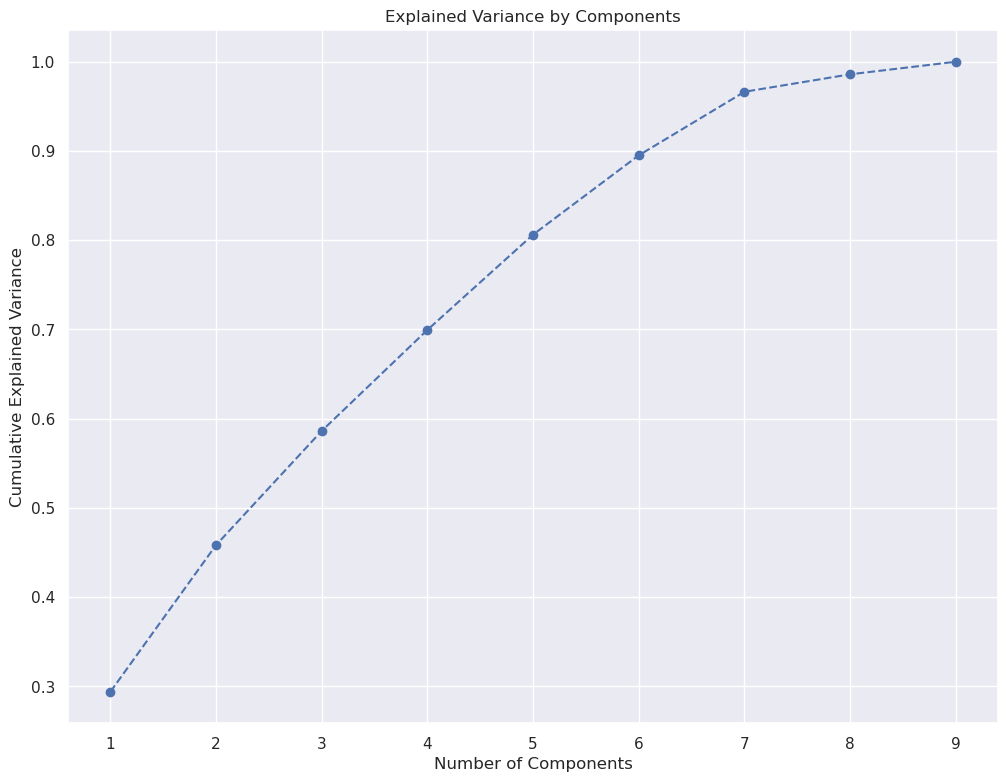

In [35]:
plt.figure(figsize = (12,9))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [36]:
pca = PCA(n_components = 4)

In [37]:
pca.fit(segmentation_std)
pca.components_

array([[ 0.06279409,  0.46722221,  0.0047395 ,  0.04134634,  0.08026609,
         0.51762183, -0.47903357, -0.4861532 , -0.18930196],
       [-0.39129199, -0.36674443, -0.02813932,  0.05095732, -0.44532731,
        -0.24774395, -0.4309069 , -0.11698388, -0.49994117],
       [ 0.51391196, -0.07125832, -0.16195811, -0.49318063,  0.35306604,
        -0.21189098, -0.14748036,  0.12845298, -0.5035426 ],
       [ 0.12130517, -0.07074973,  0.78238873,  0.42898158,  0.2738765 ,
        -0.02060984, -0.02729242,  0.15479573, -0.28979738]])

In [38]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3','Component 4'])
df_pca_comp

,Education,Income,Recency,_num_days,Age,Spent,Family_Size,Is_Parent,Living_With
Component 1,0.063,0.467,0.005,0.041,0.080,0.518,-0.479,-0.486,-0.189
Component 2,-0.391,-0.367,-0.028,0.051,-0.445,-0.248,-0.431,-0.117,-0.500
Component 3,0.514,-0.071,-0.162,-0.493,0.353,-0.212,-0.147,0.128,-0.504
Component 4,0.121,-0.071,0.782,0.429,0.274,-0.021,-0.027,0.155,-0.290


([<matplotlib.axis.YTick at 0x7847e65d3610>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4')])

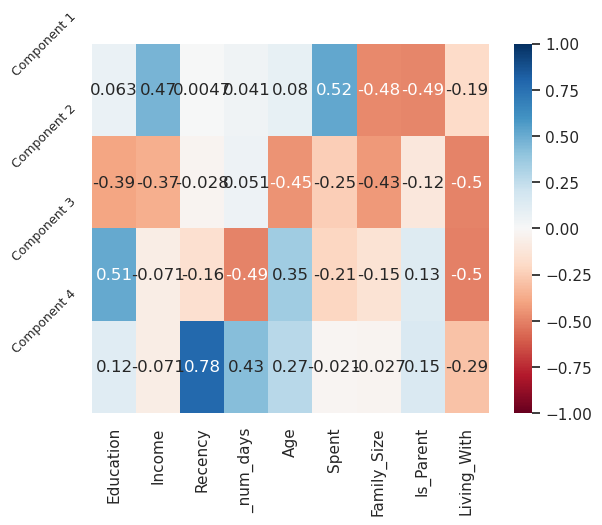

In [39]:
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2,3], 
           ['Component 1', 'Component 2', 'Component 3','Component 4'],
           rotation = 45,
           fontsize = 9)

In [40]:
scores_pca = pca.transform(segmentation_std)

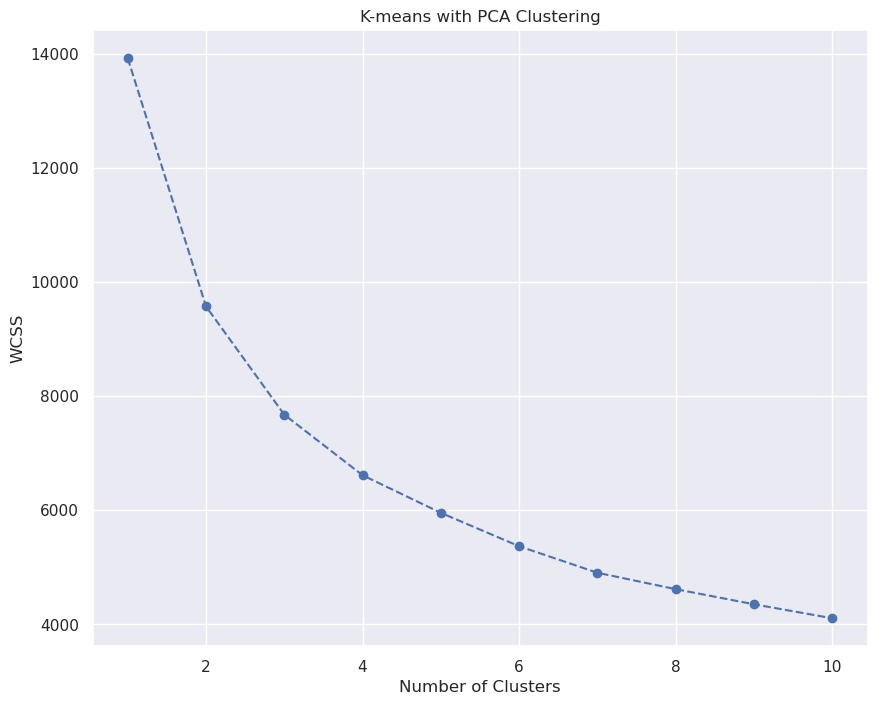

In [41]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
    
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()  

In [42]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3','Component 4']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_segm_pca_kmeans.head()

,Education,Income,Recency,_num_days,Age,Spent,Family_Size,Is_Parent,Living_With,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,1,58138.000,58,971,58,1617,1,0,0,3.007,0.896,-0.515,1.458,0
1,1,46344.000,38,125,61,27,3,1,0,-0.882,0.261,2.039,-0.198,2
2,1,71613.000,26,472,50,776,2,0,1,1.504,-0.282,-0.484,-1.167,0
3,1,26646.000,26,65,31,53,3,1,1,-1.901,0.681,0.331,-1.877,3
4,2,58293.000,94,321,34,422,3,1,1,-0.724,-0.735,0.053,0.573,1


In [43]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Education,Income,Recency,_num_days,Age,Spent,Family_Size,Is_Parent,Living_With,Component 1,Component 2,Component 3,Component 4
Segment K-means PCA,,,,,,,,,,,,,
0,1.297,76629.617,49.519,516.111,47.128,1393.308,1.648,0.067,0.577,2.445,-0.111,-0.273,-0.209
1,1.597,54255.319,51.203,490.342,51.714,545.210,3.353,0.983,0.978,-0.759,-1.211,0.080,0.074
2,1.290,42117.265,48.703,497.485,45.886,312.389,2.151,0.847,0.050,-0.143,1.079,0.917,0.426
3,0.786,33999.124,46.012,553.104,37.890,189.380,3.120,0.902,0.971,-1.455,0.452,-0.867,-0.363


In [44]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Age']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'high class',
                         1:'upper class',
                         2:'average class',
                         3:'below average class'})
df_segm_pca_kmeans_freq

,Education,Income,Recency,_num_days,Age,Spent,Family_Size,Is_Parent,Living_With,Component 1,Component 2,Component 3,Component 4,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,
high class,1.297,76629.617,49.519,516.111,47.128,1393.308,1.648,0.067,0.577,2.445,-0.111,-0.273,-0.209,522,0.236
upper class,1.597,54255.319,51.203,490.342,51.714,545.210,3.353,0.983,0.978,-0.759,-1.211,0.080,0.074,637,0.288
average class,1.290,42117.265,48.703,497.485,45.886,312.389,2.151,0.847,0.050,-0.143,1.079,0.917,0.426,563,0.255
below average class,0.786,33999.124,46.012,553.104,37.890,189.380,3.120,0.902,0.971,-1.455,0.452,-0.867,-0.363,490,0.222


In [45]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'high class',
                         1:'upper class',
                         2:'average class',
                         3:'below average class'})

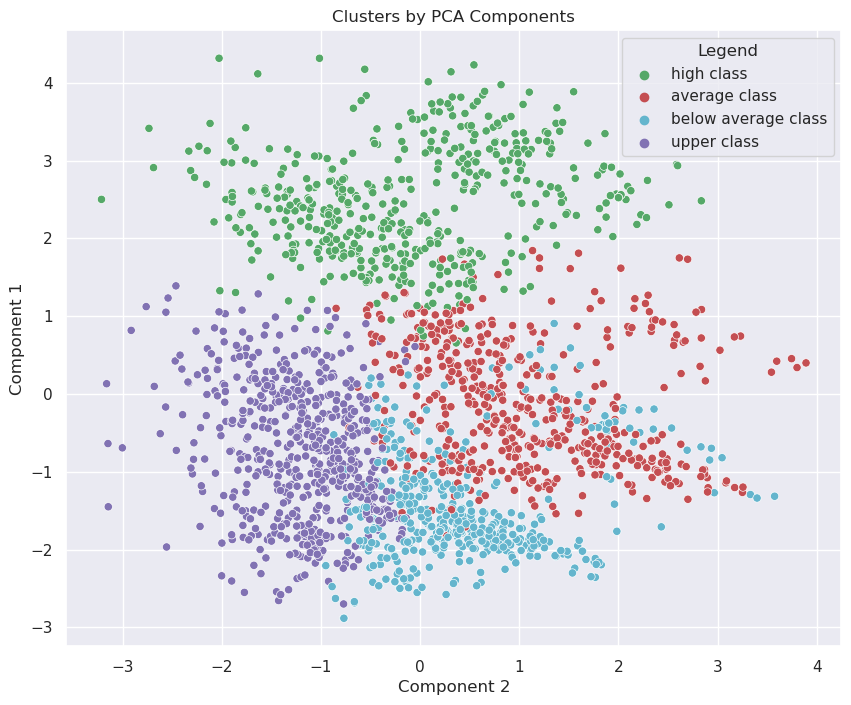

In [46]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Legend'], palette=['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

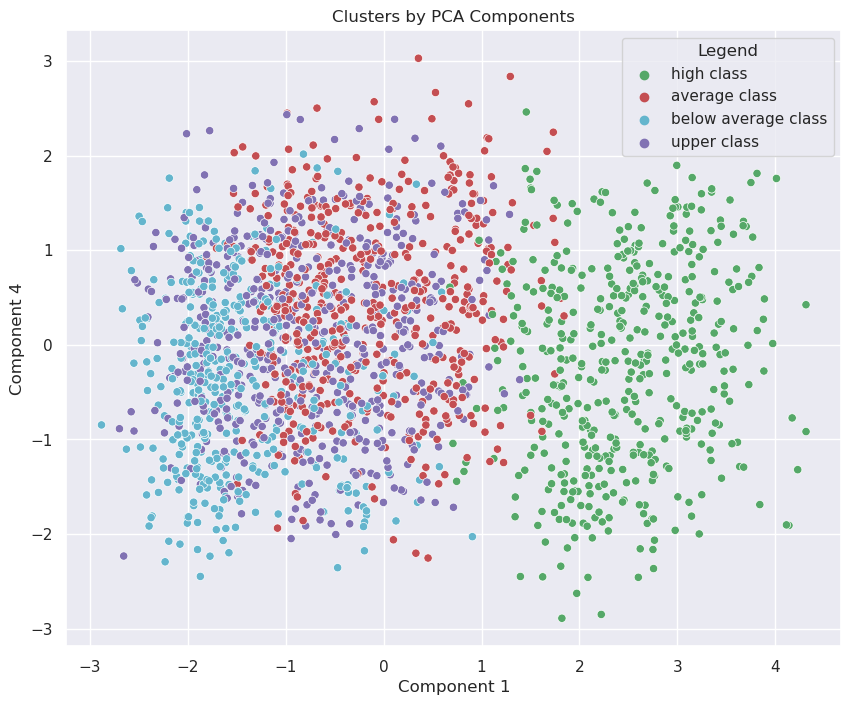

In [47]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 4']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Legend'], palette=['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

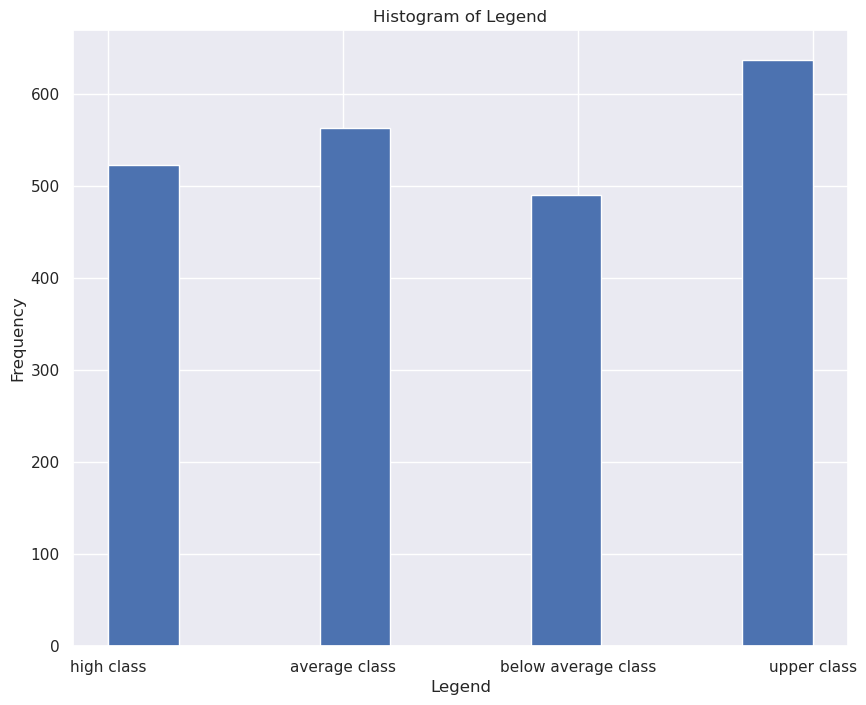

In [67]:

# Increase the figure size
plt.figure(figsize=(10, 8))

# Plot the histogram
plt.hist(df_segm_pca_kmeans["Legend"])

# Set the labels and title
plt.xlabel("Legend")
plt.ylabel("Frequency")
plt.title("Histogram of Legend")

# Display the histogram
plt.show()


In [59]:
data['index'] = data.index  # Convert index to a column
merged_data = data.merge(df_segm_pca_kmeans[['Legend']], how='left', left_on='index', right_on=df_segm_pca_kmeans.index)


In [60]:
merged_data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,_num_days,Age,Spent,Living_With,Children,Family_Size,Is_Parent,index,Legend
0,Graduate,58138.000,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,971,58,1617,Alone,0,1,0,0,high class
1,Graduate,46344.000,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,125,61,27,Alone,2,3,1,1,average class
2,Graduate,71613.000,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,472,50,776,Partner,0,2,0,2,high class
3,Graduate,26646.000,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,65,31,53,Partner,1,3,1,3,below average class
4,Postgraduate,58293.000,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,321,34,422,Partner,1,3,1,4,upper class


In [63]:
merged_data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', '_num_days',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'index', 'Legend'],
      dtype='object')

In [65]:
grouped_data = merged_data.groupby('Legend')[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].mean()
grouped_data

,Wines,Fruits,Meat,Fish,Sweets,Gold
Legend,,,,,,
average class,320.830,24.595,166.134,38.212,26.611,46.658
below average class,320.894,27.766,173.433,40.280,30.203,44.530
high class,292.878,25.106,157.915,34.062,24.981,41.402
upper class,291.065,28.009,172.350,38.676,27.065,43.389


In [49]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))